In [ ]:
!pip install snscrape

In [ ]:
!pip install python-git

In [ ]:
# !pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('IPO GoTo since:2022-03-22 until:2022-03-29').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])


In [ ]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2022-03-28 18:42:23+00:00,1508514856865267713,Kayaknya beli ipo goto high risk high return b...,Ikhwanmuhh
1,2022-03-28 18:03:21+00:00,1508505033519685632,@teguhinvestor Bagus sekali ulasan prospektus ...,iamlege46622405
2,2022-03-28 17:43:28+00:00,1508500030252253184,Sources: Indonesia's GoTo raises ~$1.1B in its...,bosgue_
3,2022-03-28 15:36:14+00:00,1508468013154316291,"Saya Sudah Baca Prospektus IPO GOTO, dan Ini P...",ifhayz
4,2022-03-28 15:19:48+00:00,1508463873539686411,"@MrZackMorris These ipos can goto 30, just bew...",CapNourishment
...,...,...,...,...
574,2022-03-22 01:08:02+00:00,1506075195165257729,"Shm! Yg pesen ipo GoTo, hari pertama jual seba...",Saham_fess
575,2022-03-22 01:06:44+00:00,1506074867459928072,Proses penawaran umum saham alias IPO GoTo diu...,detikfinance
576,2022-03-22 01:01:05+00:00,1506073444118581254,"Kelar IPO, GoTo Akan Borong Saham MPPA? https:...",fundflow1
577,2022-03-22 01:00:18+00:00,1506073247451738116,Kok ini IPO GOTO ngiklannya jor joran yak,kucinggabut


In [ ]:
tweets_df2.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')

In [ ]:
tweets_df2.to_csv("GoTo.csv")

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 42.0 MB/s 
     |████████████████████████████████| 895 kB 36.3 MB/s 
     |████████████████████████████████| 6.5 MB 35.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
# model = RobertaModel.from_pretrained(pretrained_name)
# tokenizer = RobertaTokenizerFast.from_pretrained(pretrained_name)

sentiment_classifier = pipeline('sentiment-analysis', model=pretrained_name, tokenizer=pretrained_name)

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/789k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
sentiment_classifier("Pelayanan hotel ini sangat buruk.")

[{'label': 'negative', 'score': 0.999271810054779}]

In [ ]:
# Passing the tweets into the sentiment pipeline and extracting the sentiment score and label
tweets_df2 = (
    tweets_df2
    .assign(sentiment = lambda x: x['Text'].apply(lambda s: sentiment_classifier(s)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

In [ ]:
tweets_df2.head(585)

,Datetime,Tweet Id,Text,Username,sentiment,label,score
0,2022-03-28 18:42:23+00:00,1508514856865267713,Kayaknya beli ipo goto high risk high return b...,Ikhwanmuhh,"[{'label': 'positive', 'score': 0.992313444614...",positive,0.992313
1,2022-03-28 18:03:21+00:00,1508505033519685632,@teguhinvestor Bagus sekali ulasan prospektus ...,iamlege46622405,"[{'label': 'positive', 'score': 0.949633240699...",positive,0.949633
2,2022-03-28 17:43:28+00:00,1508500030252253184,Sources: Indonesia's GoTo raises ~$1.1B in its...,bosgue_,"[{'label': 'neutral', 'score': 0.9724007844924...",neutral,0.972401
3,2022-03-28 15:36:14+00:00,1508468013154316291,"Saya Sudah Baca Prospektus IPO GOTO, dan Ini P...",ifhayz,"[{'label': 'neutral', 'score': 0.9368391036987...",neutral,0.936839
4,2022-03-28 15:19:48+00:00,1508463873539686411,"@MrZackMorris These ipos can goto 30, just bew...",CapNourishment,"[{'label': 'negative', 'score': 0.997335493564...",negative,0.997335
...,...,...,...,...,...,...,...
574,2022-03-22 01:08:02+00:00,1506075195165257729,"Shm! Yg pesen ipo GoTo, hari pertama jual seba...",Saham_fess,"[{'label': 'negative', 'score': 0.769637465476...",negative,0.769637
575,2022-03-22 01:06:44+00:00,1506074867459928072,Proses penawaran umum saham alias IPO GoTo diu...,detikfinance,"[{'label': 'neutral', 'score': 0.9980837106704...",neutral,0.998084
576,2022-03-22 01:01:05+00:00,1506073444118581254,"Kelar IPO, GoTo Akan Borong Saham MPPA? https:...",fundflow1,"[{'label': 'neutral', 'score': 0.9933542013168...",neutral,0.993354
577,2022-03-22 01:00:18+00:00,1506073247451738116,Kok ini IPO GOTO ngiklannya jor joran yak,kucinggabut,"[{'label': 'negative', 'score': 0.993195891380...",negative,0.993196


In [ ]:
tweets_df2['Text'][4]

'@MrZackMorris These ipos can goto 30, just beware the dump!'

In [ ]:
tweets_df2['Text'][16]

'"Tampaknya GoTo mementingkan investor lokal untuk tahapan IPO ini. Kabarnya mereka sebagian besar adalah fund managers dengan horizon investasi jangka panjang. GoTo tampaknya lebih mementingkan kualitas investor ketimbang kuantitas," ujarnya.'

In [ ]:
tweets_df2['Text'][17]

'@FadelRizkiM Secara potensi, $GOTO lebih menarik menurut saya, pertanyaannya apakah mereka bisa realisasi semua potensinya dan berapa banyak dari potensinya sudah termasuk dalam harga IPO nya'

In [ ]:
tweets_df2['Text'][47]

'GoTo has already slashed its target valuation in advance of its IPO. But it’s still having a hard time convincing investors \nhttps://t.co/lU9Jp28Yk9'

In [ ]:
tweets_df2['Text'][3]

'Saya Sudah Baca Prospektus IPO GOTO, dan Ini Poin-Poin Pentingnya https://t.co/BWY23cJXrZ'

In [ ]:
tweets_df2['Text'][349]

'GoTo dan BEI sudah buka suara soal buzzer IPO GoTo. https://t.co/rp28ay6QrD'

In [ ]:
tweets_df2['Text'][577]

'Kok ini IPO GOTO ngiklannya jor joran yak'

In [ ]:
import plotly.graph_objects as go

In [ ]:
#Visualizing the sentiments


fig = go.Figure()

fig.add_trace(go.Bar(x = tweets_df2["score"],
                    y = tweets_df2["label"],
                orientation = "h")) #set orientation to horizontal because we want to flip the x and y-axis

fig.update_layout(plot_bgcolor = "white")              
                                #apply our custom category order

fig.show()

In [ ]:
import re
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
def cleanText(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [ ]:
tweets_df2['Text'] = tweets_df2['Text'].apply(cleanText)

In [ ]:
tweets_df2

,Datetime,Tweet Id,Text,Username,sentiment,label,score
0,2022-03-28 18:42:23+00:00,1508514856865267713,Kayaknya beli ipo goto high risk high return b...,Ikhwanmuhh,"[{'label': 'positive', 'score': 0.992313444614...",positive,0.992313
1,2022-03-28 18:03:21+00:00,1508505033519685632,Bagus sekali ulasan prospektus IPO GOTO ini. ...,iamlege46622405,"[{'label': 'positive', 'score': 0.949633240699...",positive,0.949633
2,2022-03-28 17:43:28+00:00,1508500030252253184,Sources: Indonesia's GoTo raises ~$1.1B in its...,bosgue_,"[{'label': 'neutral', 'score': 0.9724007844924...",neutral,0.972401
3,2022-03-28 15:36:14+00:00,1508468013154316291,"Saya Sudah Baca Prospektus IPO GOTO, dan Ini P...",ifhayz,"[{'label': 'neutral', 'score': 0.9368391036987...",neutral,0.936839
4,2022-03-28 15:19:48+00:00,1508463873539686411,"These ipos can goto 30, just beware the dump!",CapNourishment,"[{'label': 'negative', 'score': 0.997335493564...",negative,0.997335
...,...,...,...,...,...,...,...
574,2022-03-22 01:08:02+00:00,1506075195165257729,"Shm! Yg pesen ipo GoTo, hari pertama jual seba...",Saham_fess,"[{'label': 'negative', 'score': 0.769637465476...",negative,0.769637
575,2022-03-22 01:06:44+00:00,1506074867459928072,Proses penawaran umum saham alias IPO GoTo diu...,detikfinance,"[{'label': 'neutral', 'score': 0.9980837106704...",neutral,0.998084
576,2022-03-22 01:01:05+00:00,1506073444118581254,"Kelar IPO, GoTo Akan Borong Saham MPPA?",fundflow1,"[{'label': 'neutral', 'score': 0.9933542013168...",neutral,0.993354
577,2022-03-22 01:00:18+00:00,1506073247451738116,Kok ini IPO GOTO ngiklannya jor joran yak,kucinggabut,"[{'label': 'negative', 'score': 0.993195891380...",negative,0.993196


In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
list_stopwords = stopwords.words('indonesian')

tweets = tweets_df2['Text'] = tweets_df2['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (list_stopwords)]))

In [ ]:
print(tweets_df2['Text'])

0      Kayaknya beli ipo goto high risk high return b...
1      Bagus sekali ulasan prospektus IPO GOTO ini. M...
2      Sources: Indonesia's GoTo raises ~$1.1B IPO 33...
3      Saya Sudah Baca Prospektus IPO GOTO, dan Ini P...
4                       These ipos goto 30, beware dump!
                             ...                        
574    Shm! Yg pesen ipo GoTo, hari pertama jual seba...
575    Proses penawaran umum saham alias IPO GoTo diu...
576              Kelar IPO, GoTo Akan Borong Saham MPPA?
577            Kok ini IPO GOTO ngiklannya jor joran yak
578                   IPO GoTo Mundur Jadi 24 Maret 2022
Name: Text, Length: 579, dtype: object


In [ ]:
print(tweets)

0      Kayaknya beli ipo goto high risk high return b...
1      Bagus ulasan prospektus IPO GOTO ini. Memang s...
2      Sources: Indonesia's GoTo raises ~$1.1B IPO 33...
3      Saya Sudah Baca Prospektus IPO GOTO, Ini Poin-...
4                       These ipos goto 30, beware dump!
                             ...                        
574    Shm! Yg pesen ipo GoTo, jual semuanya, hargany...
575    Proses penawaran saham alias IPO GoTo diundur....
576              Kelar IPO, GoTo Akan Borong Saham MPPA?
577                Kok IPO GOTO ngiklannya jor joran yak
578                   IPO GoTo Mundur Jadi 24 Maret 2022
Name: Text, Length: 579, dtype: object


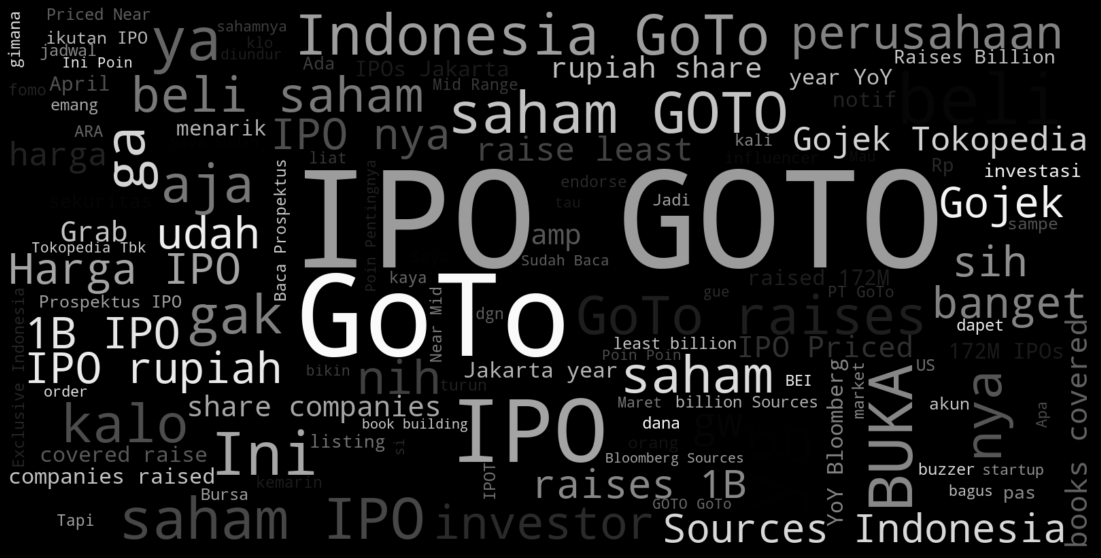

In [ ]:
allWords = ' '.join([twts for twts in tweets])
wordCloud = WordCloud(colormap="gray", width=1600, height=800, random_state=30, max_font_size=200, min_font_size=20).generate(allWords)
# Menampilkan (Plotting) Word Cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

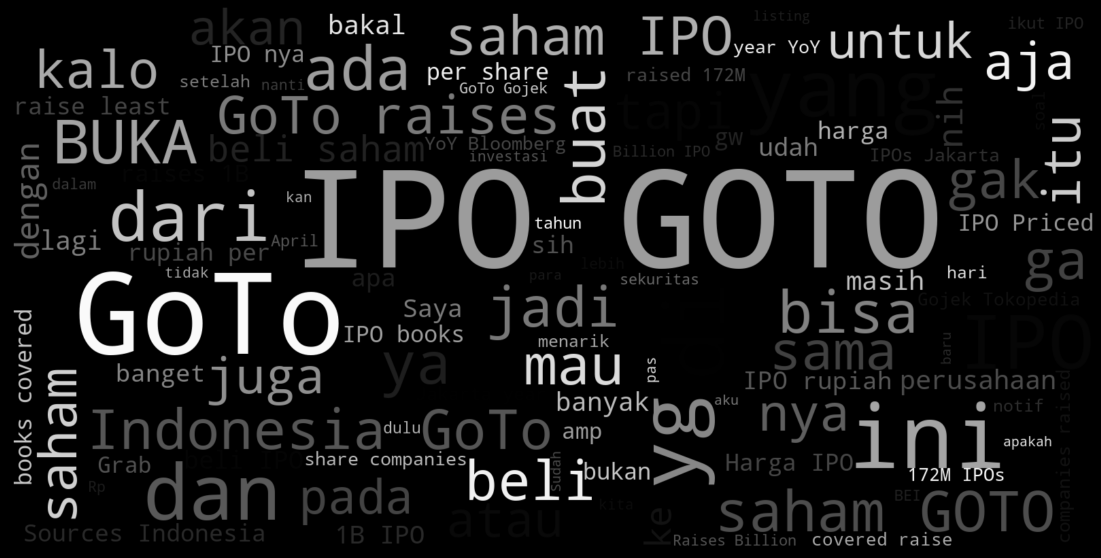

In [ ]:
allWords = ' '.join([twts for twts in tweets_df2['Text']])
wordCloud = WordCloud(colormap="gray", width=1600, height=800, random_state=30, max_font_size=200, min_font_size=20).generate(allWords)
# Menampilkan (Plotting) Word Cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()